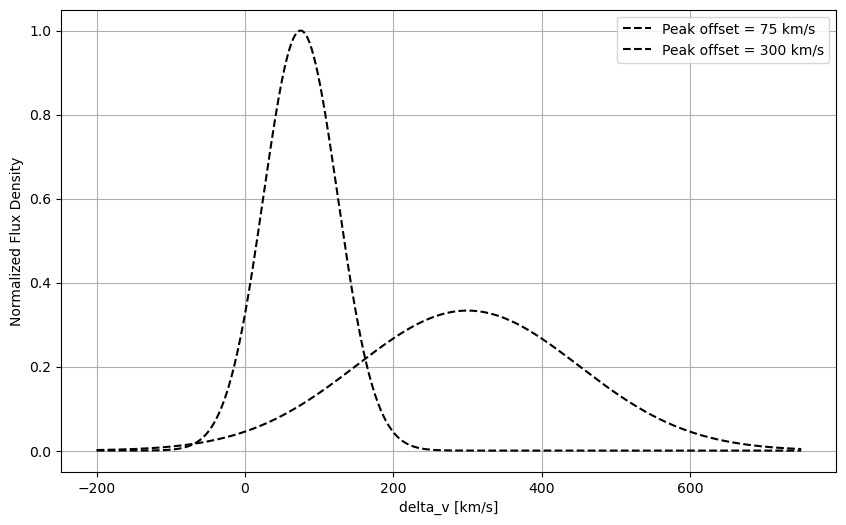

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def intrinsic_lya_lineshape(velocity, delta_v, sigma_alpha):
    lineshape = np.exp(-0.5 * ((velocity - delta_v) / sigma_alpha)**2)
    return lineshape



if __name__ == "__main__":
   
    sigma_alpha1 = 50
    sigma_alpha2 = 150
    velocity = np.linspace(-200, 750, 1000)

   
    delta_v1 = 75  #First offset
    delta_v2 = 300  # Second offset

    # Two line shapes
    lineshape1 = intrinsic_lya_lineshape(velocity, delta_v1, sigma_alpha1)
    lineshape2 = intrinsic_lya_lineshape(velocity, delta_v2, sigma_alpha2)

    #Plotting the ressult
    plt.figure(figsize=(10, 6))
    plt.plot(velocity, lineshape1_normalized, 'k--', label=f"Peak offset = {delta_v1} km/s")
    plt.plot(velocity, lineshape2_normalized, 'k--', label=f"Peak offset = {delta_v2} km/s")
    plt.xlabel("delta_v [km/s]")
    plt.ylabel("Normalized Flux Density") #actually haven't normalized yet
    plt.legend()
    plt.grid()
    plt.show()


### Trying to play with asymmetry and v_separation(velocity difference between two peaks?)

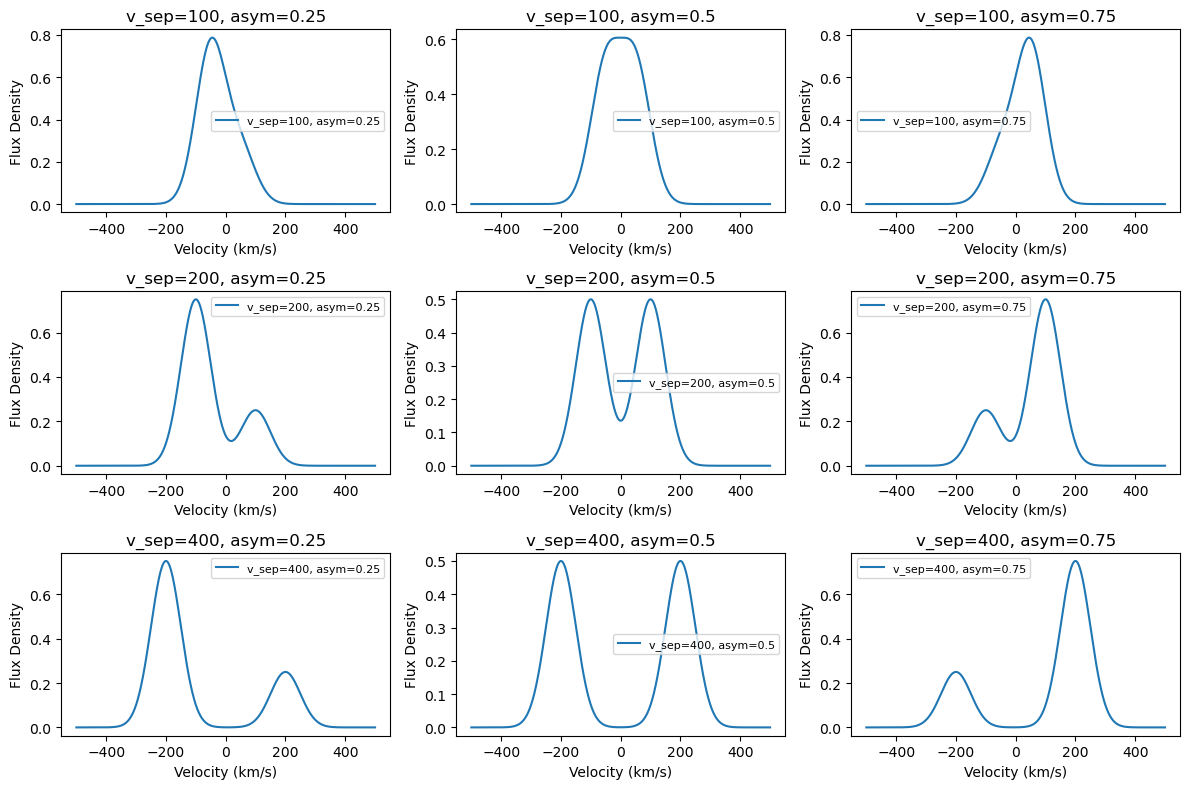

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma)**2)

def two_gaussians_with_asymmetry(velocity, v_separation, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red

    # First Gaussian (blueshifted)
    gaussian_blue = gaussian(velocity, -v_separation / 2, sigma, amplitude=l_blue)

    # Second Gaussian (redshifted)
    gaussian_red = gaussian(velocity, v_separation / 2, sigma, amplitude=l_red)

    # Combining them
    return gaussian_blue + gaussian_red


if __name__ == "__main__":
 
    velocity = np.linspace(-500, 500, 1000)
    sigma = 50
    v_separations = [100, 200, 400]  # Velocity separations (km/s)
    asymmetries = [0.25, 0.5, 0.75]  # Asymmetry ratios (L_red / L_total)

    # Create plots
    plt.figure(figsize=(12, 8))

    for i, v_separation in enumerate(v_separations):
        for j, asymmetry in enumerate(asymmetries):
            profile = two_gaussians_with_asymmetry(velocity, v_separation, sigma, asymmetry)

            # Plot the result
            plt.subplot(len(v_separations), len(asymmetries), i * len(asymmetries) + j + 1)
            plt.plot(velocity, profile, label=f"v_sep={v_separation}, asym={asymmetry}")
            plt.title(f"v_sep={v_separation}, asym={asymmetry}")
            plt.xlabel("Velocity (km/s)")
            plt.ylabel("Flux Density")
            plt.legend(fontsize=8)
            

    plt.tight_layout()
    plt.savefig('intrinsic_double_peaks.png')
    plt.show()

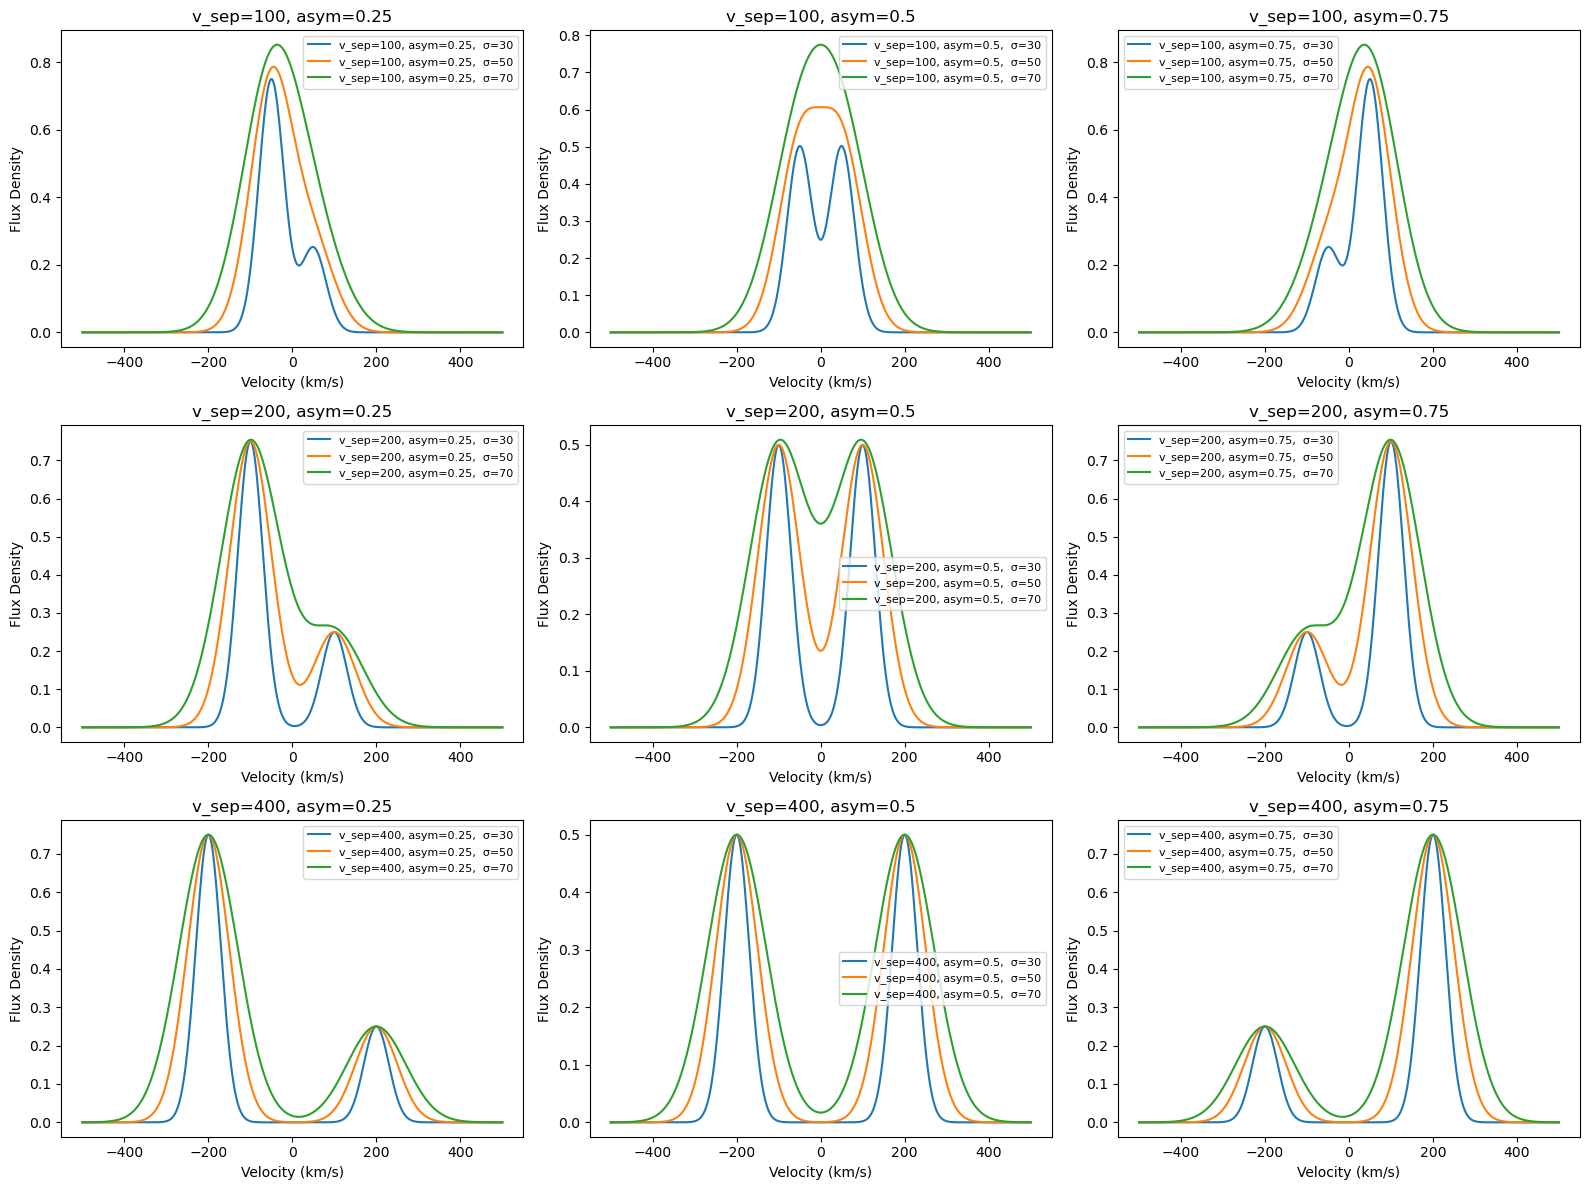

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma)**2)

def two_gaussians_with_asymmetry(velocity, v_separation, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red

    # First Gaussian (blueshifted)
    gaussian_blue = gaussian(velocity, -v_separation / 2, sigma, amplitude=l_blue)

    # Second Gaussian (redshifted)
    gaussian_red = gaussian(velocity, v_separation / 2, sigma, amplitude=l_red)

    # Combining them
    return gaussian_blue + gaussian_red


if __name__ == "__main__":
 
    velocity = np.linspace(-500, 500, 1000)
    sigmas = [30, 50, 70]
    v_separations = [100, 200, 400]  # Velocity separations (km/s)
    asymmetries = [0.25, 0.5, 0.75]  # Asymmetry ratios (L_red / L_total)

    # Create plots
    plt.figure(figsize=(16, 12))

    for i, v_separation in enumerate(v_separations):
        for j, asymmetry in enumerate(asymmetries):
            for k, sigma in enumerate(sigmas):
                profile = two_gaussians_with_asymmetry(velocity, v_separation, sigma, asymmetry)
    
                # Plot the result
                plt.subplot(len(v_separations), len(asymmetries), i * len(asymmetries) + j + 1)
                plt.plot(velocity, profile, label=f"v_sep={v_separation}, asym={asymmetry},  σ={sigma}")
                plt.title(f"v_sep={v_separation}, asym={asymmetry}")
                plt.xlabel("Velocity (km/s)")
                plt.ylabel("Flux Density")
                plt.legend(fontsize=8)
            

    plt.tight_layout()
    plt.savefig('intrinsic_double_peaks.png')
    plt.show()

### Trying to compare the intrinsic and observed 

ValueError: x and y must have same first dimension, but have shapes (200,) and (2, 200)

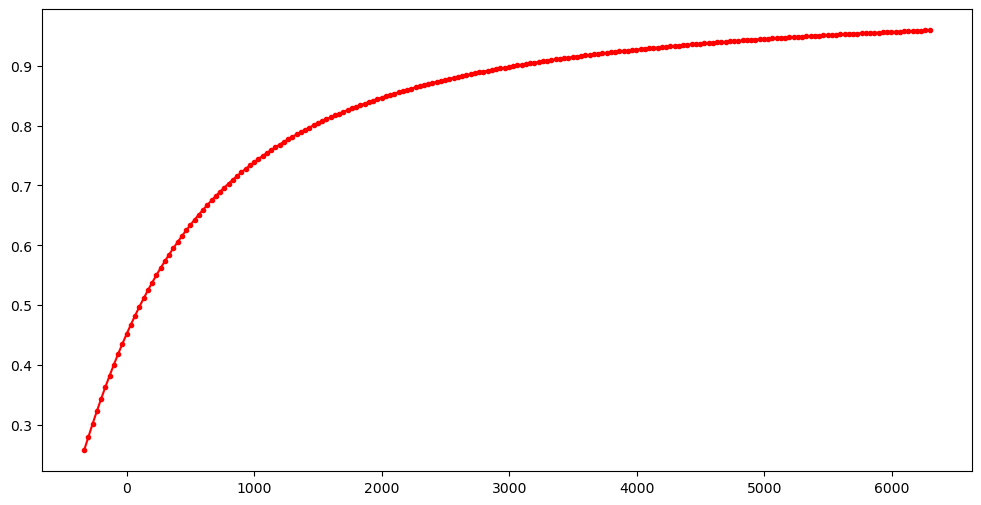

In [1]:
import numpy as np
import matplotlib.pyplot as plt


file_path = 'D:/Master-Thesis/21cmFAST-master/Output/Tot_Tau_lists/output'

with open(file_path, 'r') as file:
    lines = file.readlines()
    row1 = list(map(float, lines[0].strip().split()[5:])) 
    row2 = list(map(float, lines[17].strip().split()[5:]))


x_values = np.array(row1[::2])  
y_values_1 = np.array(row2)

transmission_H1 = np.exp(-np.array(row2))


# Gaussian function
def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma)**2)

# Parameters 
delta_v = 1200  # Velocity offset (km/s)
sigma = 1000     # Standard deviation (km/s)
amplitude = 1  # Peak amplitude

def instrinsic_gaussians(velocity, v_separation, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red

    # First Gaussian (blueshifted)
    gaussian_blue = gaussian(velocity, -v_separation / 2, sigma, amplitude=l_blue)

    # Second Gaussian (redshifted)
    gaussian_red = gaussian(velocity, v_separation / 2, sigma, amplitude=l_red)

    # Combining them
    combined_profile = gaussian_blue + gaussian_red
    return combined_profile, velocity

    
# Compute Gaussian profile
gaussian_profile = instrinsic_gaussians(x_values, delta_v, sigma, 0.25)

# Multiply Gaussian profile with the transmission
combined2_profile = gaussian_profile * transmission_H1

# Plotting the results
plt.figure(figsize=(12, 6))

# Original transmission plot
plt.plot(x_values, transmission_H1, marker='o', color='red', markersize=3, label='Transmission H1')

# Gaussian profile
plt.plot(x_values, gaussian_profile, color='blue', label='Gaussian Profile')

# Combined profile
#plt.plot(x_values, combined_profile, color='green', linestyle='--', label='Combined (Gaussian × Transmission)')
plt.plot(x_values, combined2_profile, color='green', linestyle='--', label='Combined (Gaussian × Transmission)')

# Labels and legends
plt.xlabel('Velocity Offset (km/s)')
plt.ylabel('Transmission')
plt.title('Gaussian × Transmission Profile')
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
#plt.plot(x_values, transmission_H1, marker='o', color = 'Red', markersize = 3, label = 'Halo 1(mass = +, Rbub = + cMpc)')
plt.xlabel('Velocity_offset(km/s)')
plt.ylabel('Transmission')
plt.grid()
plt.legend()
